In [165]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np



In [166]:
data = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-train.csv')
data.set_index('V1', inplace=True)
data

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
V1,,,,,,,,,,,,,,,,,,,,,
D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.40,1021.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.30,2781.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.90,1066.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.00,1064.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.70,3057.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4223,10000.00,3230.00,3238.00,3234.00,3225.00,3209.00,3207.00,3203.00,3204.00,3172.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4224,10000.00,3997.00,4000.00,3973.00,3963.00,3984.00,3956.00,3896.00,3869.00,3859.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4225,352000.00,4186.00,4171.00,4196.00,4184.00,4192.00,4192.00,4178.00,4146.00,4153.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
data = data.iloc[0]

In [168]:
data = data.dropna()  # drop null values
data = data.to_frame()
data

,D1
V2,1017.1
V3,1019.3
V4,1017.0
V5,1019.2
V6,1018.7
...,...
V1003,2015.6
V1004,2009.7
V1005,2022.1
V1006,2031.6


In [169]:
step_sizes = data['D1'].diff()
drift = step_sizes.mean()
error_var = np.var(step_sizes)
print('The estimated drift in the series is:', drift,error_var)


The estimated drift in the series is: 1.0075621890547264 52.473455251107694


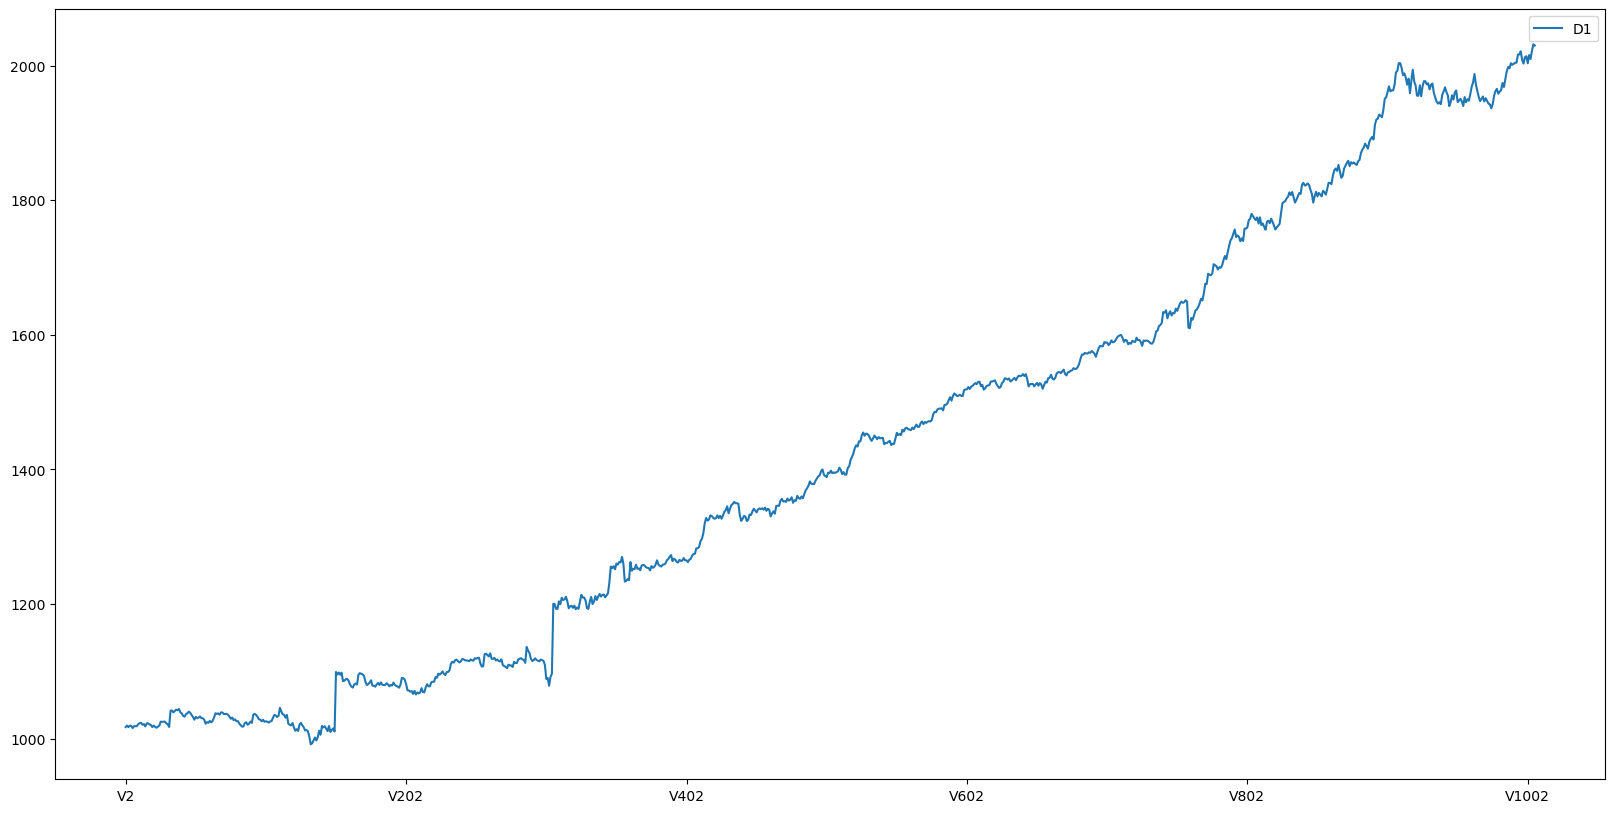

In [170]:
data.plot(figsize=(20,10))
plt.show()

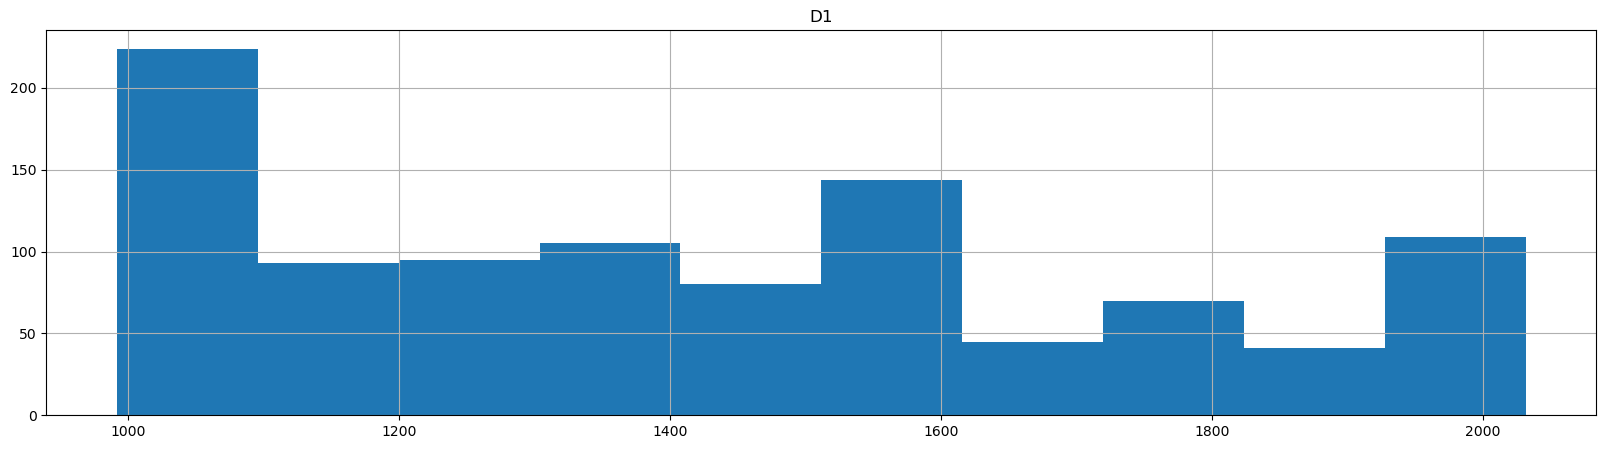

In [171]:
fig = data.hist(figsize = (20,5))

In [172]:
train = data
train

,D1
V2,1017.1
V3,1019.3
V4,1017.0
V5,1019.2
V6,1018.7
...,...
V1003,2015.6
V1004,2009.7
V1005,2022.1
V1006,2031.6


In [173]:
train = train.reset_index(drop=True)
train

,D1
0,1017.1
1,1019.3
2,1017.0
3,1019.2
4,1018.7
...,...
1001,2015.6
1002,2009.7
1003,2022.1
1004,2031.6


In [174]:
train_len = len(train)
train_len

1006

In [175]:
test = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-test.csv')
test.set_index('V1', inplace=True)
test

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,,,,,,,,,,,,,,
D1,2039.20,2035.00,2051.80,2061.80,2063.50,2069.50,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
D2,2986.00,3001.20,2975.90,2996.10,2981.90,2985.50,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
D3,1120.70,1117.90,1115.10,1112.30,1109.50,1106.70,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
D4,1190.00,1162.00,1134.00,1106.00,1078.00,1050.00,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
D5,5904.67,5917.05,5922.58,5928.80,5935.29,6002.80,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4223,3050.00,3125.00,3262.00,3262.00,3520.00,3520.00,3515.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00,3494.00
D4224,3719.00,3754.00,3754.00,3721.00,3730.00,3727.00,3700.00,3700.00,3708.00,3708.00,3708.00,3708.00,3708.00,3708.00
D4225,4014.00,4023.00,4056.00,4070.00,4085.00,4095.00,4118.00,4110.00,4159.00,4167.00,4145.00,4168.00,4068.00,4066.00


In [176]:
test = test.iloc[0]
test

V2     2039.2
V3     2035.0
V4     2051.8
V5     2061.8
V6     2063.5
V7     2069.5
V8     2054.0
V9     2057.0
V10    2062.8
V11    2066.4
V12    2067.4
V13    2071.4
V14    2083.8
V15    2080.6
Name: D1, dtype: float64

In [177]:
test = test.dropna()  # drop null values
test = test.to_frame()
test

,D1
V2,2039.2
V3,2035.0
V4,2051.8
V5,2061.8
V6,2063.5
V7,2069.5
V8,2054.0
V9,2057.0
V10,2062.8
V11,2066.4


In [178]:
test.set_index(pd.RangeIndex(start=train.index[-1]+1, stop=train.index[-1]+1+len(test)), inplace=True)
test

,D1
1006,2039.2
1007,2035.0
1008,2051.8
1009,2061.8
1010,2063.5
1011,2069.5
1012,2054.0
1013,2057.0
1014,2062.8
1015,2066.4


In [179]:
def random_walk_forecast(train, test):
    history = list(train["D1"])
    predictions = pd.DataFrame(columns=['D1'])
    for i in range(len(test)):
        # Generate the forecast
        yhat = history[-1] + np.random.normal(0, 1) + drift
        predictions.loc[test.index[i]] = yhat
        # Calculate and print the error
        error = yhat - history[-1] - drift
        print(error)
        # Update the history
        history.append(yhat)
    return predictions

predictions_df = random_walk_forecast(train,test)

-0.08246345708140512
1.250049258202478
0.0798826379488109
-1.1591684709443253
-0.27101707018197163
0.5587772140899123
-0.28125186688258696
-2.244268753002518
0.6797608630985341
0.07675023633659106
-2.0614441821402236
0.20205342889961497
-0.45921229367000893
0.014994332093818175


In [180]:
predictions_df

,D1
1006,2030.625099
1007,2032.882710
1008,2033.970155
1009,2033.818549
1010,2034.555094
1011,2036.121433
1012,2036.847744
1013,2035.611037
1014,2037.298360
1015,2038.382672


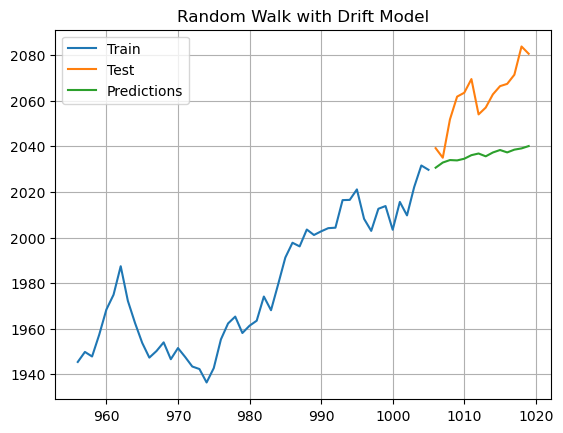

In [181]:
predictions_df = pd.DataFrame(predictions_df, columns=['D1'], index=test.index)
plt.grid()
plt.plot(train['D1'].tail(50), label='Train')
plt.plot(test['D1'].tail(50), label='Test')
plt.plot(predictions_df['D1'].tail(50), label='Predictions')
plt.legend(loc='best')
plt.title('Random Walk with Drift Model')
plt.show()

In [182]:
mse = mean_squared_error(test, predictions_df)
print(f'MSE: {mse:.2f}')

MSE: 781.48
